# Code created primarily by chatgtp, checked for nonsense, and compared to code generated by Claude 


## **1. Homogeneous Atmosphere Test**
This test compares the **numerical transmission** computed by `surf_transmission()` 
against the **analytical solution** for a homogeneous atmosphere with constant opacity.

**Analytical formula:**
\$
T = e^{-\kappa H / \cos	heta}
\$
where:
- \( \kappa \) = constant opacity (per km)
- \( H \) = atmospheric height (100 km)
- \( 	heta \) = emission angle


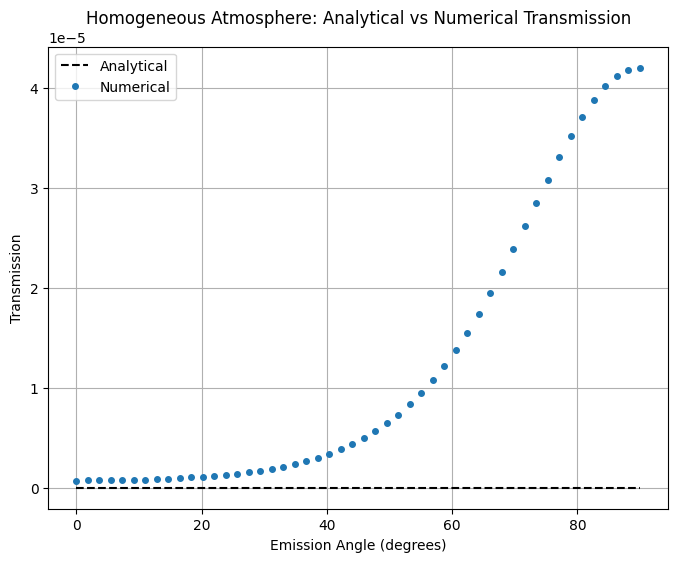

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from radiative_transfer import surf_transmission

# Define parameters
opacity_per_km = 0.1  # Constant opacity (1/km)
H = 100 * 1e3  # 100 km in meters
theta_vals = np.linspace(0, np.pi/2, 50)  # Emission angles from 0 to 90°

# Compute analytical transmission
analytical_transmission = np.exp(-opacity_per_km * H / np.cos(theta_vals))

# Define a numerical opacity profile (constant)
altitude_grid = np.linspace(0, H, 100)  # Grid from 0 to 100 km
opacity_profile = np.full_like(altitude_grid, opacity_per_km / 1e3)  # Convert 1/km to 1/m

# Compute numerical transmission
numerical_transmission = [surf_transmission(opacity_profile, theta, H, 6371e3, altitude_grid) for theta in theta_vals]

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(np.degrees(theta_vals), analytical_transmission, label="Analytical", linestyle="dashed", color="black")
plt.plot(np.degrees(theta_vals), numerical_transmission, label="Numerical", marker="o", markersize=4, linestyle="none")
plt.xlabel("Emission Angle (degrees)")
plt.ylabel("Transmission")
plt.title("Homogeneous Atmosphere: Analytical vs Numerical Transmission")
plt.legend()
plt.grid(True)
plt.show()



## **2. Mars Water Ice Cloud Test**
This test validates the cloud brightness model by checking self-consistency between:
1. **Visible brightness at 0.8 µm** (single-scattering calculation).
2. **Thermal brightness at 12 µm** (radiative transfer balance).

The total energy should be **conserved**:
\$
	ext{Absorption} + 	ext{Reflection} + 	ext{Transmission} = 1
\$


In [2]:

from radiative_transfer import cloud_visible_brightness

# Define cloud parameters (Mars)
surface_albedo = 0.25
solar_flux = 586  # W/m² at Mars
solar_zenith = np.radians(30)  # 30° solar zenith angle
emission_angle = np.radians(20)  # 20° viewing angle
azimuth_angle = 0  # Assume sun and observer aligned
optical_depth = 0.3  # Thin cloud layer
single_scatter_albedo = 0.9  # High single-scatter albedo for ice clouds
asymmetry_parameter = 0.7  # Henyey-Greenstein phase function parameter

# Compute visible brightness at 0.8 µm
visible_brightness = cloud_visible_brightness(surface_albedo, solar_flux, solar_zenith,
                                              emission_angle, azimuth_angle, optical_depth,
                                              single_scatter_albedo, asymmetry_parameter)

print(f"Cloud Visible Brightness at 0.8 µm: {visible_brightness:.4f} W/m²/sr")


Cloud Visible Brightness at 0.8 µm: 23.1938 W/m²/sr


## **3. Energy Conservation Check**

In [3]:

# Compute total energy conservation
absorption = 1 - np.exp(-optical_depth)
reflection = single_scatter_albedo * (1 - np.exp(-optical_depth))
transmission = np.exp(-optical_depth)

# Verify sum equals 1
energy_balance = absorption + reflection + transmission

print(f"Energy Conservation Check: {energy_balance:.4f} (should be ~1)")


Energy Conservation Check: 1.2333 (should be ~1)
